In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Load Dataset

In [ ]:
#Load dataset
df=pd.read_csv("/content/drive/MyDrive/Trimester 1 2024 2025/Social Media Computing/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Check dataset shape
df.shape

(8807, 12)

In [ ]:
# View column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Check missing values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Handle missing data
df=df.fillna('Not specified')

In [ ]:
# Check if any missing values remain
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# Data Cleaning

In [ ]:
# Keep only necessary columns
df = df[['release_year', 'description']].rename(columns={'release_year': 'Release Year'})

In [ ]:
print(df.head())

   Release Year                                        description
0          2020  As her father nears the end of his life, filmm...
1          2021  After crossing paths at a party, a Cape Town t...
2          2021  To protect his family from a powerful drug lor...
3          2021  Feuds, flirtations and toilet talk go down amo...
4          2021  In a city of coaching centers known to train I...


In [ ]:
!pip install nltk

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Function to clean text
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Rejoin tokens into cleaned strings
    return ' '.join(filtered_tokens)

In [ ]:
# Apply cleaning function to 'description'
df['cleaned_description'] = df['description'].apply(clean_text)

# Preview cleaned data
print(df[['description', 'cleaned_description']].head())

                                         description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   

                                 cleaned_description  
0  father nears end life filmmaker kirsten johnso...  
1  crossing paths party cape town teen sets prove...  
2  protect family powerful drug lord skilled thie...  
3  feuds flirtations toilet talk go among incarce...  
4  city coaching centers known train indias fines...  


# Sentiment Analysis

## TextBlob

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def textblob_sentiment (text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    # Assign sentiment based on polarity score
    if polarity > 0:
      return 'Positive'
    elif polarity == 0:
      return 'Neutral'
    else:
      return 'Negative'

In [ ]:
# Apply sentiment function to cleaned descriptions
df['sentiment_textblob'] = df['cleaned_description'].apply(textblob_sentiment)

# Preview sentiment results
print(df[['description', 'cleaned_description', 'sentiment_textblob']].head())

                                         description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   

                                 cleaned_description sentiment_textblob  
0  father nears end life filmmaker kirsten johnso...           Positive  
1  crossing paths party cape town teen sets prove...            Neutral  
2  protect family powerful drug lord skilled thie...           Negative  
3  feuds flirtations toilet talk go among incarce...           Positive  
4  city coaching centers known train indias fines...            Neutral  


## VADER

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
vader = SentimentIntensityAnalyzer()

# Function to get sentiment from VADER
def sentiment_vader(text):
  scores = vader.polarity_scores(text)
  compound = scores['compound']

  # Assign sentiment based on compound score
  if compound >= 0.05:
    return 'Positive'
  elif compound <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

In [ ]:
# Apply VADER sentiment analysis
df['sentiment_vader'] = df['cleaned_description'].apply(sentiment_vader)

# Preview the results
print(df[['description', 'cleaned_description', 'sentiment_vader']].head())

                                         description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   

                                 cleaned_description sentiment_vader  
0  father nears end life filmmaker kirsten johnso...        Negative  
1  crossing paths party cape town teen sets prove...        Negative  
2  protect family powerful drug lord skilled thie...        Negative  
3  feuds flirtations toilet talk go among incarce...        Positive  
4  city coaching centers known train indias fines...        Positive  


## Transformers - BERT

In [ ]:
!pip install transformers
!pip install torch

In [ ]:
from transformers import pipeline

# Load pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function to get sentiment from BERT
def bert_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']

# Map star ratings to broader sentiment categories
def map_sentiment(star_rating):
    if star_rating == '5 stars' or star_rating == '4 stars':
        return 'Positive'
    elif star_rating == '3 stars':
        return 'Neutral'
    elif star_rating == '2 stars' or star_rating == '1 star':
        return 'Negative'

# Apply BERT sentiment analysis
df['bert_sentiment'] = df['cleaned_description'].apply(bert_sentiment)
df['map_bert_sentiment'] = df['bert_sentiment'].apply(map_sentiment)

# Preview the results
print(df[['description', 'cleaned_description', 'bert_sentiment', 'map_bert_sentiment']].head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


                                         description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   

                                 cleaned_description bert_sentiment  \
0  father nears end life filmmaker kirsten johnso...        5 stars   
1  crossing paths party cape town teen sets prove...         1 star   
2  protect family powerful drug lord skilled thie...        5 stars   
3  feuds flirtations toilet talk go among incarce...        4 stars   
4  city coaching centers known train indias fines...        5 stars   

  map_bert_sentiment  
0           Positive  
1           Negative  
2           Positive  
3           Positive  
4           Positive  


# Visualization

## TextBlob

In [ ]:
import plotly.express as px

# Group data by release year and sentiment
df_grouped = df.groupby(['Release Year', 'sentiment_textblob']).size().reset_index(name='Total Content')

# Filter for years >= 2010
df_grouped = df_grouped[df_grouped['Release Year'] >= 2010]

# Create a bar chart
fig = px.bar(df_grouped,
             x='Release Year',
             y='Total Content',
             color='sentiment_textblob',
             title='TextBlob Sentiment of content on Netflix',
             labels={'Release Year': 'Release Year', 'Total Content': 'Number of Titles'})
fig.show()

## VADER

In [ ]:
import plotly.express as px

# Group data by release year and sentiment
df_grouped = df.groupby(['Release Year', 'sentiment_vader']).size().reset_index(name='Total Content')

# Filter for years >= 2010
df_grouped = df_grouped[df_grouped['Release Year'] >= 2010]

# Create a bar chart
fig = px.bar(df_grouped,
             x='Release Year',
             y='Total Content',
             color='sentiment_vader',
             title='VADER Sentiment of content on Netflix',
             labels={'Release Year': 'Release Year', 'Total Content': 'Number of Titles'})
fig.show()

## BERT

In [ ]:
import plotly.express as px

# Group data by release year and sentiment
df_grouped = df.groupby(['Release Year', 'map_bert_sentiment']).size().reset_index(name='Total Content')

# Filter for years >= 2010
df_grouped = df_grouped[df_grouped['Release Year'] >= 2010]

# Create a bar chart
fig = px.bar(df_grouped,
             x='Release Year',
             y='Total Content',
             color='map_bert_sentiment',
             title='BERT Sentiment of content on Netflix',
             labels={'release_year': 'Release Year', 'Total Content': 'Number of Titles'})
fig.show()

# Sentiment Distribution

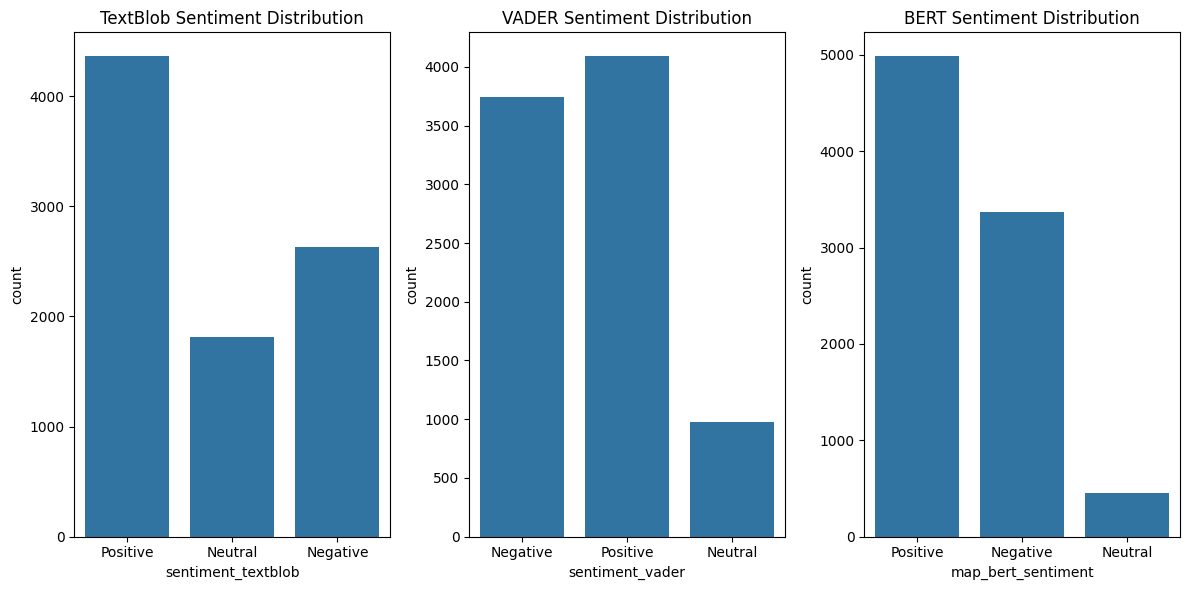

In [ ]:
# Plot sentiment distribution for each model
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='sentiment_textblob')
plt.title('TextBlob Sentiment Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='sentiment_vader')
plt.title('VADER Sentiment Distribution')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='map_bert_sentiment')
plt.title('BERT Sentiment Distribution')

plt.tight_layout()
plt.show()

# Combine Sentiments

In [ ]:
# Function to combine the results from TextBlob, VADER, and BERT using a voting mechanism
def combine_sentiments(row):
    sentiments = [row['sentiment_textblob'], row['sentiment_vader'], row['map_bert_sentiment']]
    sentiment_counts = {'Positive': sentiments.count('Positive'),
                        'Neutral': sentiments.count('Neutral'),
                        'Negative': sentiments.count('Negative')}
    return max(sentiment_counts, key=sentiment_counts.get)

# Apply the voting mechanism
df['combined_sentiment'] = df.apply(combine_sentiments, axis=1)

# Preview the result
print(df[['description', 'sentiment_textblob', 'sentiment_vader', 'map_bert_sentiment', 'combined_sentiment']].head())

                                         description sentiment_textblob  \
0  As her father nears the end of his life, filmm...           Positive   
1  After crossing paths at a party, a Cape Town t...            Neutral   
2  To protect his family from a powerful drug lor...           Negative   
3  Feuds, flirtations and toilet talk go down amo...           Positive   
4  In a city of coaching centers known to train I...            Neutral   

  sentiment_vader map_bert_sentiment combined_sentiment  
0        Negative           Positive           Positive  
1        Negative           Negative           Negative  
2        Negative           Positive           Negative  
3        Positive           Positive           Positive  
4        Positive           Positive           Positive  


## Combined Sentiment Distribution

In [ ]:
# Group by Release Year and Combined Sentiment
df_combined = df.groupby(['Release Year', 'combined_sentiment']).size().reset_index(name='Total Content')

# Filter data by Release Year >= 2010
df_combined = df_combined[df_combined['Release Year'] >= 2010]

# Bar plot for Combined Sentiment
fig_combined = px.bar(df_combined,
              x='Release Year',
              y='Total Content',
              color='combined_sentiment',
              title='Total Content by Release Year and Combined Sentiment')

fig_combined.show()